In [9]:
import os
import random
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import gc
import pandas as pd

from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [ ]:
os.mkdir('./dados')
os.mkdir('./img')

In [ ]:
pst_dados = os.path.abspath(os.path.relpath('./dados'))
pst_img = os.path.abspath(os.path.relpath('./img'))

In [10]:
microsoft = pd.read_csv('./dados/MSFT.csv')
google = pd.read_csv('./dados/GOOG.csv')
ibm = pd.read_csv('./dados/IBM.csv')
facebook = pd.read_csv('./dados/FB.csv')
oracle = pd.read_csv('./dados/ORCL.csv')
apple = pd.read_csv('./dados/AAPL.csv')

In [11]:
google.head()
#google.Date[-100:]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-06-27,262.135071,263.287567,255.880737,262.328796,262.328796,10965700
1,2008-06-30,264.514587,267.261719,259.839996,261.509125,261.509125,7579500
2,2008-07-01,258.111237,266.625854,256.829559,265.637299,265.637299,9984200
3,2008-07-02,266.521545,268.444031,261.330292,261.817139,261.817139,8500900
4,2008-07-03,263.724731,267.872742,262.045654,266.764954,266.764954,4832100


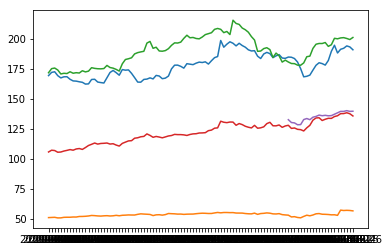

In [14]:
plt.plot(google.Date[-100:], facebook.High[-100:])
plt.plot(oracle.Date[-100:], oracle.High[-100:])
plt.plot(apple.Date[-100:], apple.High[-100:])
plt.plot(microsoft.Date[-100:], microsoft.High[-100:])
plt.plot(ibm.Date[-100:], ibm.High[-100:])

plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    google['Date'], google['High'], test_size=0.5,random_state=42)

x_test.tail

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(facebook.drop('Date', axis=1), facebook['Date'], test_size=0.5,
                                                                random_state=42)

x_test.tail, x_train.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ibm.drop('Date', axis=1), ibm['High'], test_size=0.5,
                                                                random_state=42)

x_test.shape, x_train.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(oracle.drop('Date', axis=1), oracle['Date'], test_size=0.5,
                                                                random_state=42)

x_test.shape, x_train.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(apple.drop('Date', axis=1), apple['Date'], test_size=0.5,
                                                                random_state=42)

x_test.shape, x_train.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(microsoft['Date'], microsoft['High'], test_size=0.5,
                                                                random_state=42)

x_test.tail, x_train.tail

In [ ]:
somatorio = google.High + google.Low + google.Open + google.Close


In [ ]:
for itens in google.High:
    sigmoid = (1 / (1 + (math.exp(-itens))))
    print ('O valor de itens e: {}',format(-itens))
    print ('O valor da sigmoid é: {}',format(sigmoid))

In [ ]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
for i in media:
    print ('O valor de itens e: {}',format(-i))
    print ('O valor da sigmoid é: {}',format(sigmoid(i)))

In [16]:
lista1 = [1, 2, 3]

In [17]:
lista1[0]

1

In [19]:
lista2 = [[1,2,3], [4,5,6], [7,8,9]]

In [23]:
lista2[2][2]

9

In [25]:
lista2[0][1]

2

In [32]:
import random
cidades = ['Salto', 'Itu', 'Sorocaba', 'Campinas']
escolhido = random.choice(cidades)
escolhido

'Salto'

In [33]:
a = [1,2,3]

In [35]:
a.append(44)

In [36]:
a

[1, 2, 3, 44]

In [37]:
b = [5,6,88]

In [38]:
for item in b:
    a.append(item)
a

[1, 2, 3, 44, 5, 6, 88]